In [2]:
import numpy as np
import scipy.io
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler

def dataloader(path):
    data = scipy.io.loadmat(path)
    AF = data['AF']
    modified_rows1 = AF[:-2]
    last_rows1 = AF[-2:]
    CF = data['CF']
    concatenated_array = np.concatenate((modified_rows1, CF,last_rows1), axis=0)
    new=concatenated_array
    u, count = np.unique(new[-1], return_counts=True)
    a = u[np.logical_or(count < 2, count > 2)]
    c = new[:, np.isin(new[-1], a, invert=True)]
    x = c[0:-2]; y = c[-2]; w = c[-1];
    return x.T, y.T, w.T, data['CF_info']

def calculate_accuracy(arr1, arr2):
    count = sum(1 for itr1, itr2 in zip(arr1, arr2) if itr1 == itr2)
    return count / len(arr1)

def normalization(feats):
    df = pd.DataFrame(feats)
    scaler = StandardScaler()
    x_new = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return x_new

def make_partitions(arr_words, arr_labels):
    v = []
    temp = []

    for i in range(len(arr_words) - 1):
        word = arr_words[i]
        next_word = arr_words[i + 1]
        temp.append(arr_labels[i])

        if word != next_word or i == len(arr_words) - 2:
            if i == len(arr_words) - 2:
                temp.append(arr_labels[i + 1])

            numpy_temp = np.array(temp)
            temp_max = np.amax(numpy_temp)
            numpy_temp = np.divide(numpy_temp, temp_max)
            v = np.concatenate((v, numpy_temp), axis=None)
            temp.clear()

    v1 = [1 if i == 1 else 0 for i in v]
    return v1
    
fatyp = 'TypicalFA_comb1'
drivepath = 'finalData/'+ fatyp +'/';
filee = drivepath+'GER_train_fisher-2000_FA_GT_ESTphnTrans_estStress.mat'
original_dim = 38
train_path = filee; test_path = filee.replace('train','test')
xtrain, ytrain, wtrain1, info_train1 = dataloader(train_path);
xtest, ytest, wtest1, info_test1 = dataloader(test_path);
xtest= normalization(xtest)
xtrain= normalization(xtrain)

woPP=[]; wPP=[]
input_shape1 = (19,1)
input_shape2 = (38,1)
temperature = 0.03
learning_rate=0.001

2023-06-14 15:14:11.008925: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


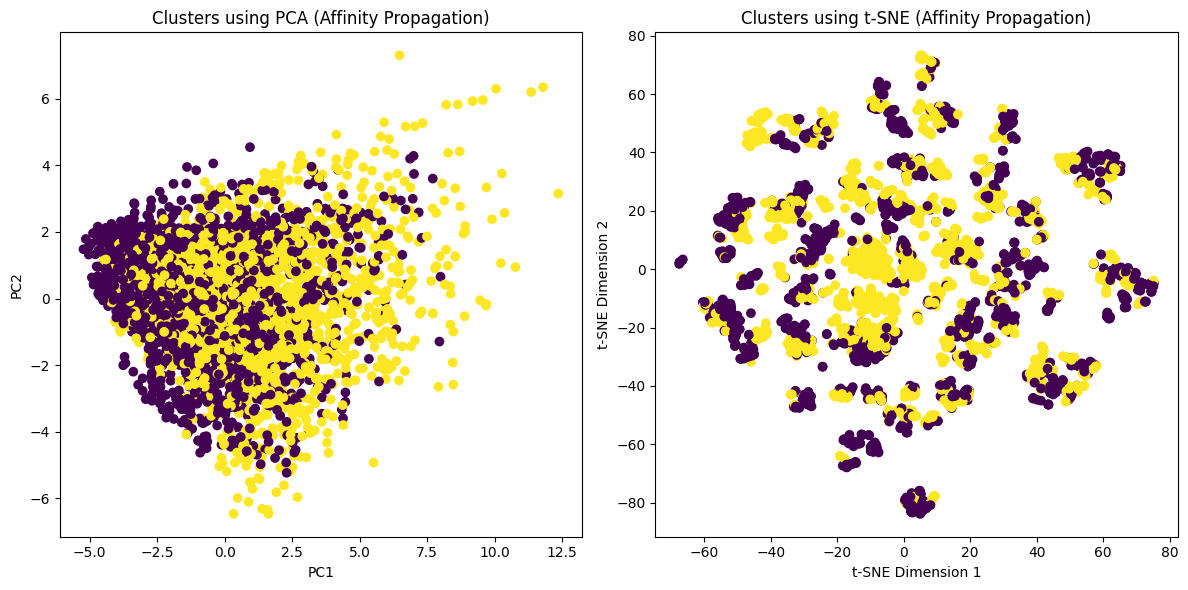

In [10]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=ytrain, cmap='viridis')
plt.title('Clusters using PCA (Affinity Propagation)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=ytrain, cmap='viridis')
plt.title('Clusters using t-SNE (Affinity Propagation)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()

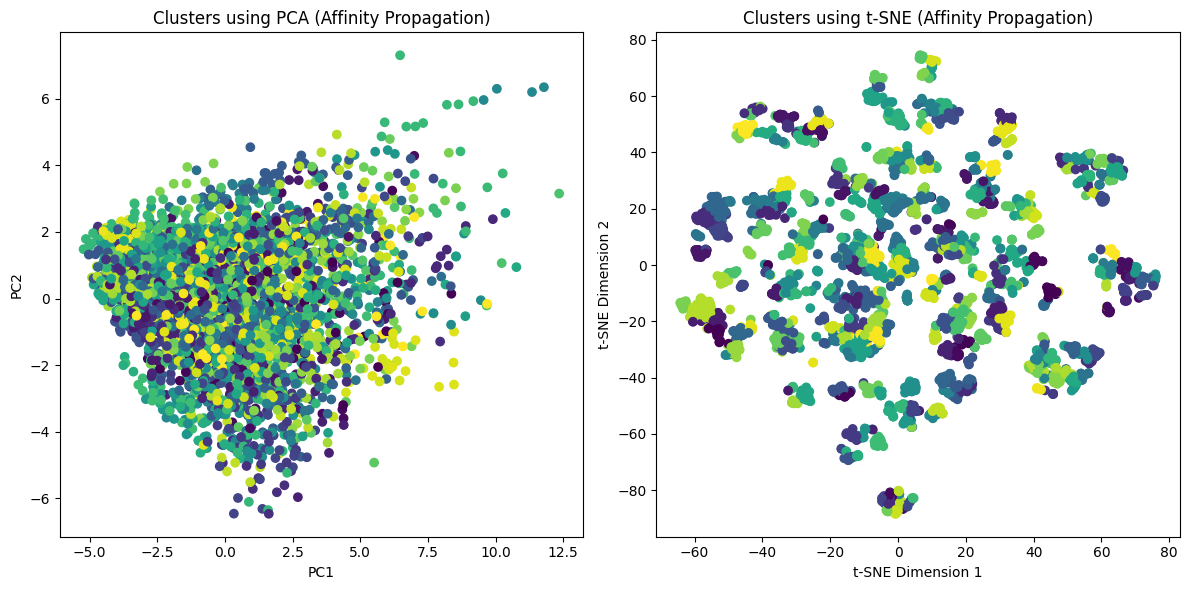

In [11]:
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform Affinity Propagation clustering
aff_prop = AffinityPropagation()
aff_prop.fit(xtrain)
labels = aff_prop.labels_
# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using PCA (Affinity Propagation)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using t-SNE (Affinity Propagation)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()

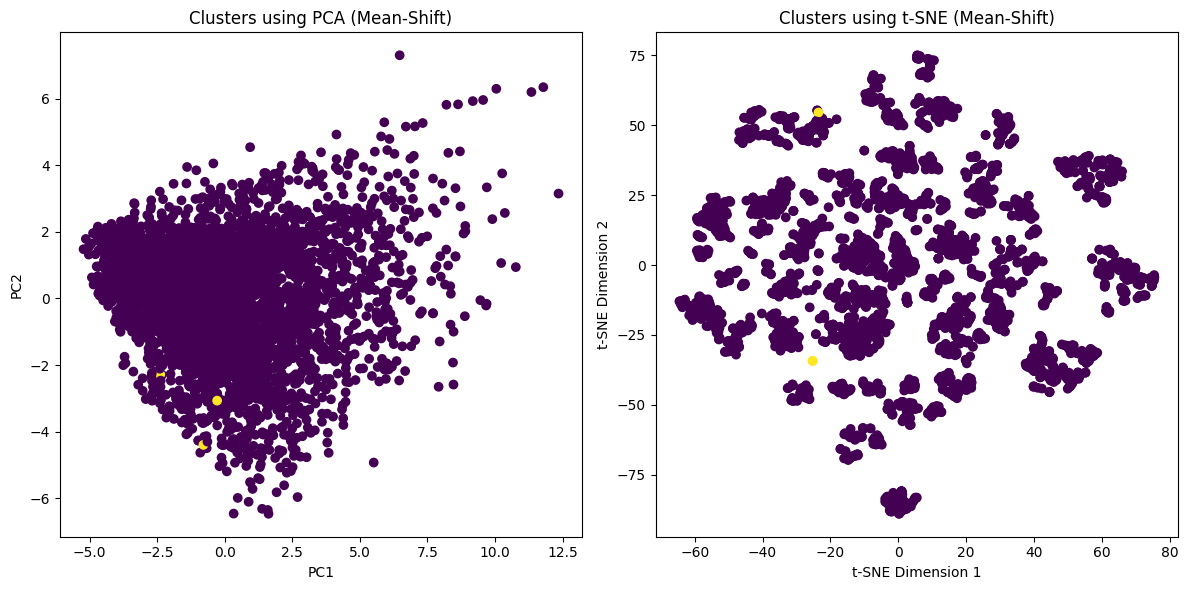

In [12]:
from sklearn.cluster import MeanShift
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform Mean-Shift clustering
mean_shift = MeanShift()
mean_shift.fit(xtrain)
labels = mean_shift.labels_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using PCA (Mean-Shift)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using t-SNE (Mean-Shift)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()

In [14]:
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
k=2
# Perform Spectral Clustering
spectral_clustering = SpectralClustering(n_clusters=k)
spectral_clustering.fit(xtrain)
labels = spectral_clustering.labels_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using PCA (Spectral Clustering)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using t-SNE (Spectral Clustering)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform Ward hierarchical clustering
ward_clustering = AgglomerativeClustering(n_clusters=k, linkage='ward')
ward_clustering.fit(xtrain)
labels = ward_clustering.labels_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using PCA (Ward Hierarchical Clustering)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using t-SNE (Ward Hierarchical Clustering)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import OPTICS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform OPTICS clustering
optics_clustering = OPTICS()
optics_clustering.fit(xtrain)
labels = optics_clustering.labels_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using PCA (OPTICS)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using t-SNE (OPTICS)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=k)
gmm.fit(xtrain)
labels = gmm.predict(xtrain)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using PCA (Gaussian Mixture Model)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using t-SNE (Gaussian Mixture Model)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.cluster import Birch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Perform BIRCH clustering
birch_clustering = Birch(n_clusters=k)
birch_clustering.fit(xtrain)
labels = birch_clustering.labels_

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(xtrain)

# Perform t-SNE
tsne = TSNE(n_components=2, perplexity=30)
tsne_result = tsne.fit_transform(xtrain)

# Plot clusters using PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using PCA (BIRCH)')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot clusters using t-SNE
plt.subplot(1, 2, 2)
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis')
plt.title('Clusters using t-SNE (BIRCH)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')

# Display the plot
plt.tight_layout()
plt.show()
